In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Data Science/STA 301 Final Project/energydata_complete.csv')
ds.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


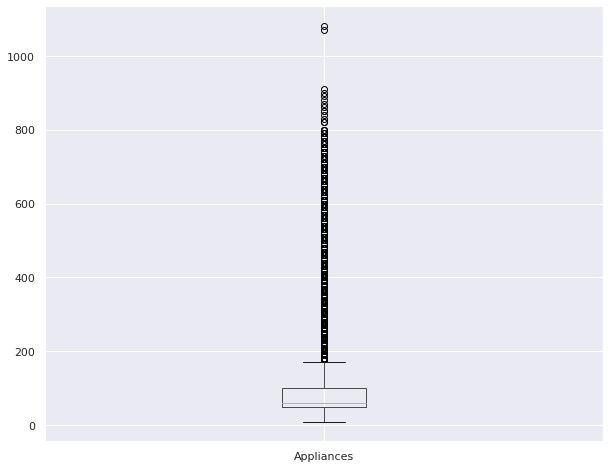

In [ ]:


ds.boxplot(column=['Appliances'])

In [ ]:
# Working with Date Time Dataset to make everything work now for Visual Analysis of the Data

ds['date']=pd.to_datetime(ds['date'],format="%Y-%m-%d %H:%M:%S")
ds['date'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:30:00
4   2016-01-11 17:40:00
Name: date, dtype: datetime64[ns]

In [ ]:
ds['month']=ds['date'].dt.month

In [ ]:
ds['year']=ds['date'].dt.year

In [ ]:
ds['day']=ds['date'].dt.day

In [ ]:
ds['dow']=ds['date'].dt.dayofweek

ds['hour']=ds['date'].dt.hour

In [ ]:
ds.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,year,day,dow,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,2016,11,0,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,2016,11,0,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,2016,11,0,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,2016,11,0,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,2016,11,0,17


In [ ]:
ds.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,year,day,dow,hour
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2016.0,16.057411,2.977249,11.502002
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,0.0,8.450998,1.985617,6.921953
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,2016.0,1.000000,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,2016.0,9.000000,1.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,2016.0,16.000000,3.000000,12.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,2016.0,23.000000,5.000000,17.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,2016.0,31.000000,6.000000,23.000000


In [ ]:
ds=ds.drop('date',axis=1)

In [ ]:
ds=ds.drop('year',axis=1)

In [ ]:
from scipy import stats
ds=ds[(np.abs(stats.zscore(ds)) < 3).all(axis=1)]



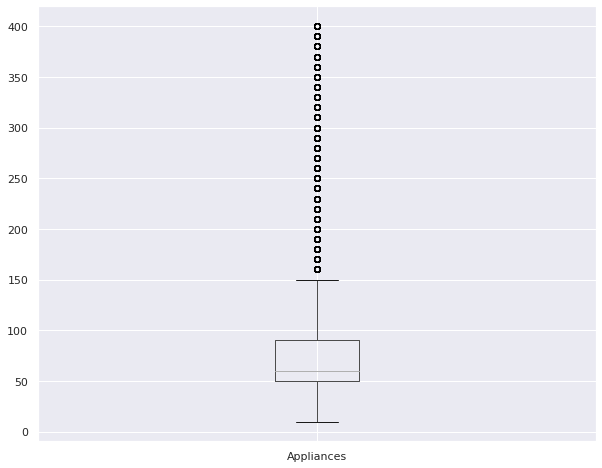

In [ ]:
ds.boxplot(column=['Appliances'])

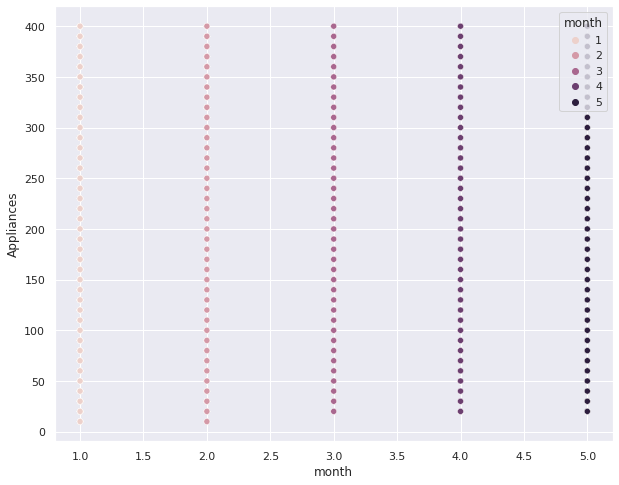

In [ ]:
sns.scatterplot(data=ds,x=ds.month,y=ds.Appliances,hue=ds.month)

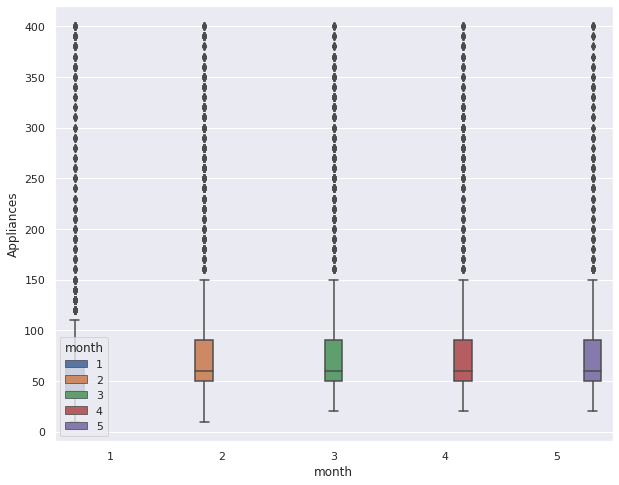

In [ ]:
sns.boxplot(data=ds,x=ds.month,y=ds.Appliances,hue=ds.month)

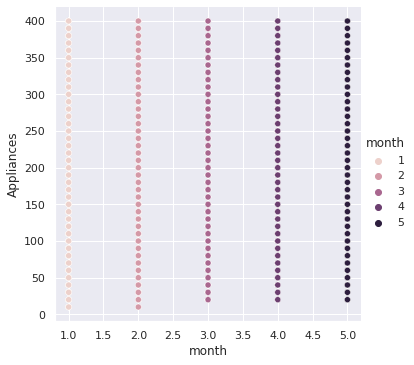

In [ ]:
sns.relplot(data=ds,x=ds.month,y=ds.Appliances,hue=ds.month,estimator=None)

In [ ]:
# Columns for temperature sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target variable column
target = ["Appliances"]

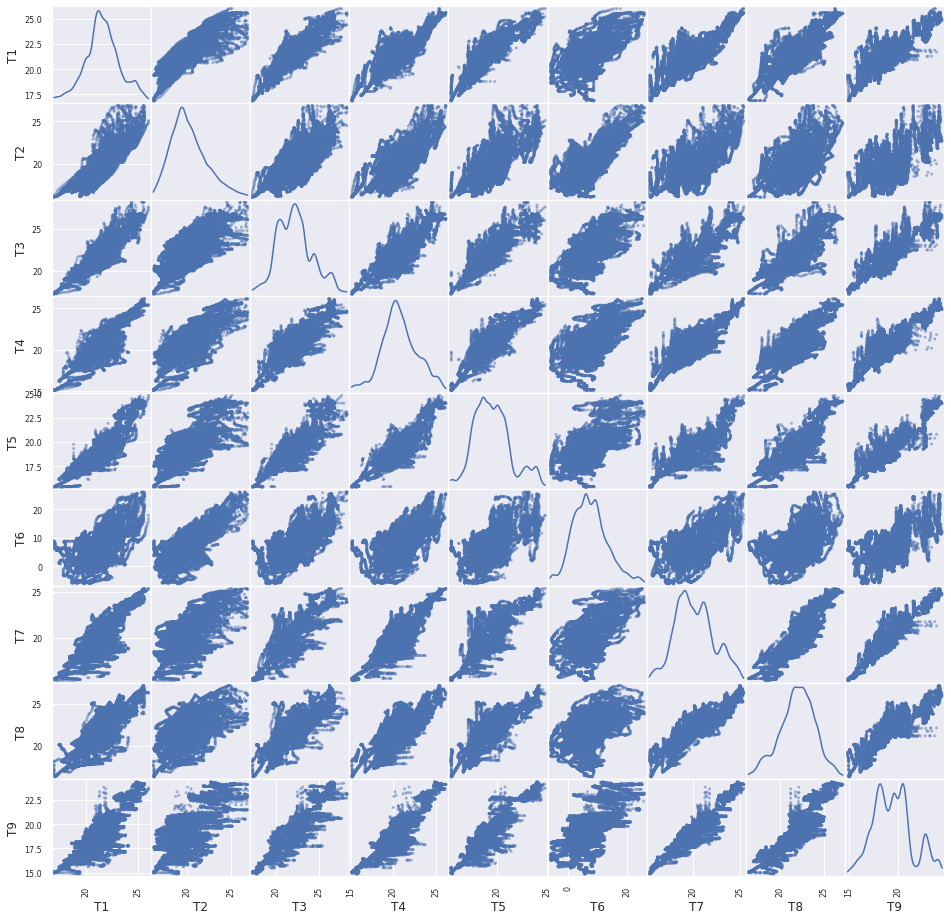

In [ ]:
Temperature_ScatterPlot=pd.plotting.scatter_matrix(ds[temp_cols], diagonal="kde", figsize=(16, 16))

In [ ]:
ds[temp_cols].corr()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
T1,1.000000,0.828892,0.890408,0.873807,0.884985,0.621880,0.835981,0.826556,0.845755
T2,0.828892,1.000000,0.716923,0.748383,0.703444,0.777092,0.647107,0.567131,0.661300
T3,0.890408,0.716923,1.000000,0.851504,0.894486,0.654638,0.844061,0.796594,0.902396
T4,0.873807,0.748383,0.851504,1.000000,0.877582,0.622397,0.877912,0.795765,0.889701
T5,0.884985,0.703444,0.894486,0.877582,1.000000,0.598666,0.875105,0.829859,0.919871
T6,0.621880,0.777092,0.654638,0.622397,0.598666,1.000000,0.588078,0.454970,0.639339
T7,0.835981,0.647107,0.844061,0.877912,0.875105,0.588078,1.000000,0.881390,0.942224
T8,0.826556,0.567131,0.796594,0.795765,0.829859,0.454970,0.881390,1.000000,0.869344
T9,0.845755,0.661300,0.902396,0.889701,0.919871,0.639339,0.942224,0.869344,1.000000


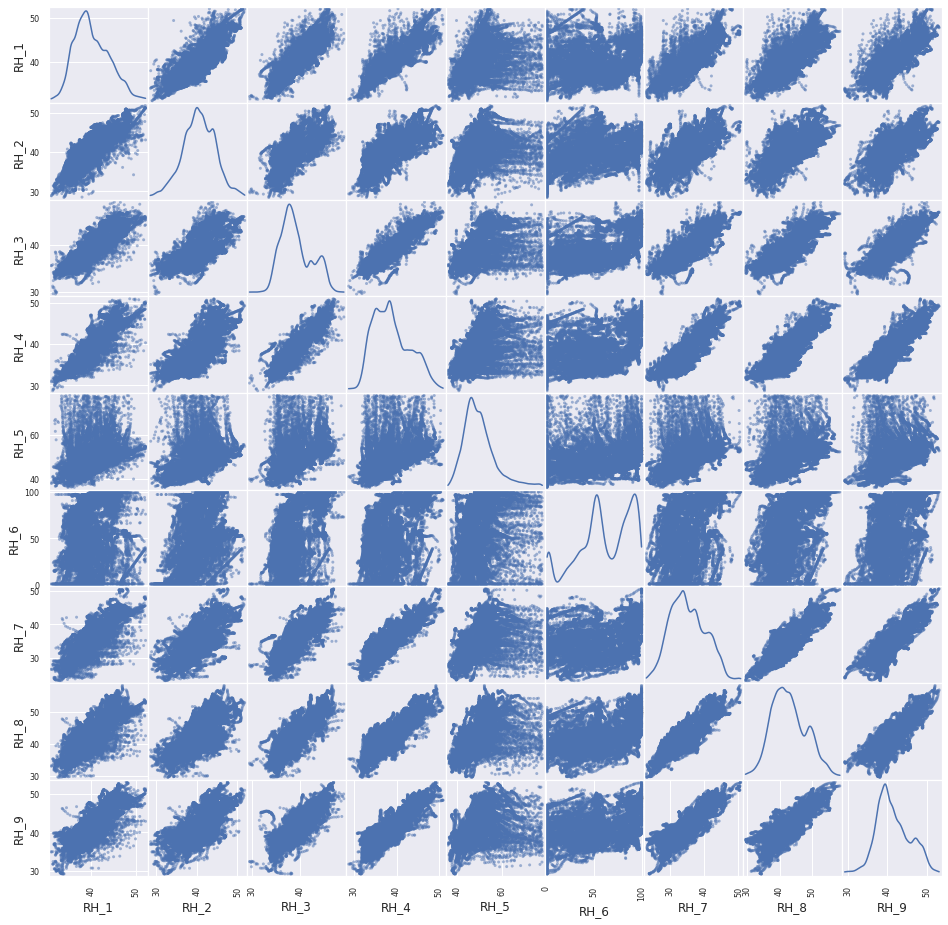

In [ ]:
Humidity_ScatterPlot=pd.plotting.scatter_matrix(ds[rho_cols], diagonal="kde", figsize=(16, 16))

In [ ]:
ds[rho_cols].corr()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
RH_1,1.000000,0.806646,0.845941,0.885725,0.370236,0.238016,0.803260,0.729118,0.765004
RH_2,0.806646,1.000000,0.677391,0.725811,0.312896,0.354283,0.704584,0.678360,0.687090
RH_3,0.845941,0.677391,1.000000,0.900214,0.453566,0.515884,0.833356,0.826033,0.838736
RH_4,0.885725,0.725811,0.900214,1.000000,0.418665,0.392544,0.888320,0.835517,0.853200
RH_5,0.370236,0.312896,0.453566,0.418665,1.000000,0.319257,0.411474,0.443560,0.368440
RH_6,0.238016,0.354283,0.515884,0.392544,0.319257,1.000000,0.364534,0.498394,0.406191
RH_7,0.803260,0.704584,0.833356,0.888320,0.411474,0.364534,1.000000,0.875700,0.851588
RH_8,0.729118,0.678360,0.826033,0.835517,0.443560,0.498394,0.875700,1.000000,0.846953
RH_9,0.765004,0.687090,0.838736,0.853200,0.368440,0.406191,0.851588,0.846953,1.000000


Text(0.5, 1.0, 'Energy Usage vs Month')

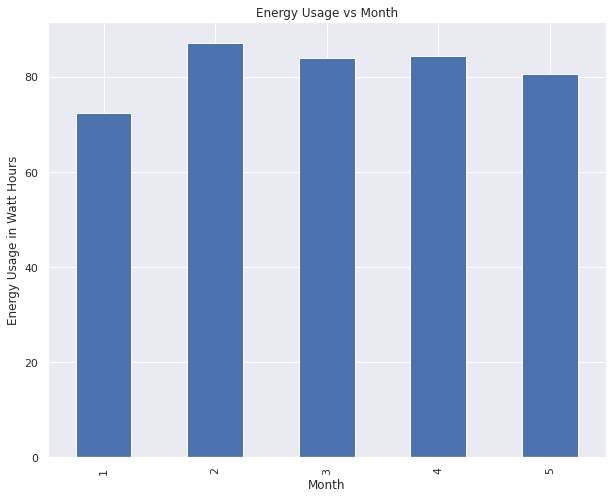

In [ ]:
def daily(x,ds=ds):
    return ds.groupby('month')[x].mean()

def daily_return(x,ds=ds):
    return ds.groupby('day')[x].mean()

def hourly(x,ds=ds):
    return ds.groupby('hour')[x].mean()

def monthly_daily(x,ds=ds):
    by_day = ds.pivot_table(index='dow', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

def day_of_the_week(x,ds=ds):
    return ds.groupby('dow')[x].mean()

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
plt.xlabel('Month')
plt.ylabel('Energy Usage in Watt Hours')
plt.title('Energy Usage vs Month')

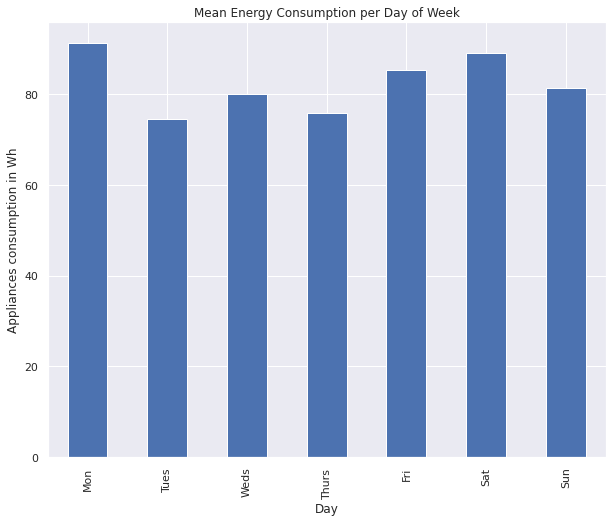

In [ ]:
day_of_the_week('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

Text(0.5, 1.0, 'Energy Usage vs Day of the Month')

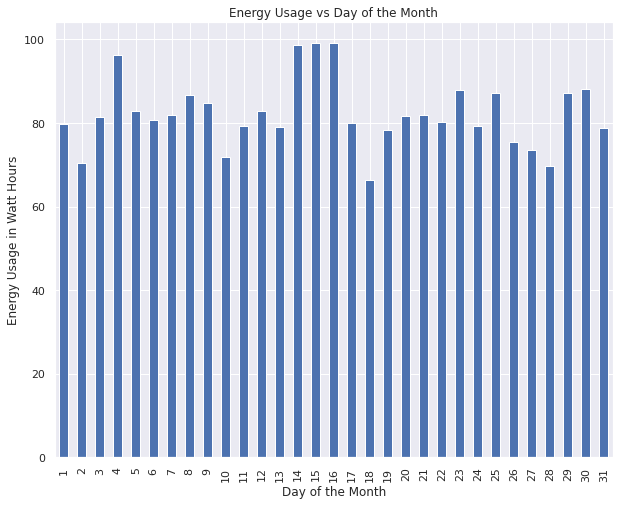

In [ ]:
daily_return('Appliances').plot(kind = 'bar', figsize=(10,8))
plt.xlabel('Day of the Month')
plt.ylabel('Energy Usage in Watt Hours')
plt.title('Energy Usage vs Day of the Month')

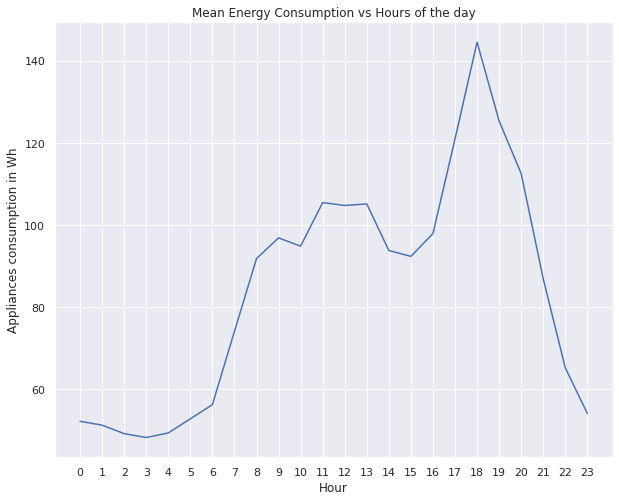

In [ ]:
hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption vs Hours of the day')

plt.xticks(ticks);

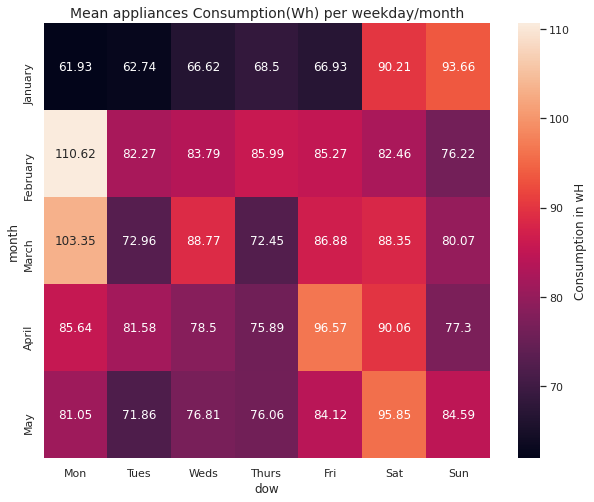

In [ ]:

# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X=ds.drop(['Appliances','T9','rv1','rv2','T6','month','day'], axis=1)
X=scaler.fit_transform(X)
Y=ds['Appliances']

In [ ]:
from sklearn.linear_model import LinearRegression

lin2=LinearRegression()

lin2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction_lgb = lin2.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print(f"The rmse of prediction for the fold is(LGB): {mean_squared_error(Y, prediction_lgb)}")
print(f"The R_square of prediction for the fold is(LGB): {r2_score(Y, prediction_lgb)}")

The rmse of prediction for the fold is(LGB): 3590.05295411198
The R_square of prediction for the fold is(LGB): 0.18441184576021108


In [ ]:
ds.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,dow,hour
count,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000
mean,82.299931,2.715060,21.610308,40.102277,20.163829,40.504086,22.197518,39.126938,20.781450,38.871400,19.510915,49.930630,7.541435,54.942897,20.235026,35.284012,21.989477,42.880871,19.462001,41.511606,7.103688,755.770732,80.388332,3.976662,38.419223,3.636637,25.034161,25.034161,3.103840,16.249423,2.976937,11.038976
std,66.347948,5.983158,1.558549,3.758586,2.005699,3.814159,1.936090,3.149491,1.995543,4.227534,1.790553,6.949767,5.696314,30.182819,2.062124,4.991271,1.952158,5.111658,1.968535,4.085672,4.990553,7.138735,13.970072,2.397896,11.847256,4.130383,14.480018,14.480018,1.321867,8.419215,1.964905,6.979751
min,10.000000,0.000000,16.890000,30.926667,16.100000,28.460000,17.290000,29.493333,15.100000,28.716000,15.330000,36.060000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,733.350000,35.166667,0.000000,3.000000,-6.600000,0.005322,0.005322,1.000000,1.000000,0.000000,0.000000
25%,50.000000,0.000000,20.700000,37.290000,18.760000,37.933333,20.730000,36.860000,19.500000,35.450000,18.200000,45.290000,3.466667,31.499167,18.700000,31.500000,20.763214,39.090000,18.000000,38.560000,3.548611,751.162500,71.000000,2.000000,29.000000,0.850000,12.592962,12.592962,2.000000,9.000000,1.000000,5.000000
50%,60.000000,0.000000,21.500000,39.500000,19.856667,40.484000,22.100000,38.466667,20.600000,38.290000,19.290000,48.790000,7.090000,55.200000,20.036111,34.700000,22.100000,42.319464,19.390000,40.826667,6.766667,756.183333,84.000000,3.500000,40.000000,3.350000,24.949342,24.949342,3.000000,17.000000,3.000000,11.000000
75%,90.000000,0.000000,22.533333,42.745000,21.290000,43.230000,23.260000,41.326667,22.000000,41.900000,20.529762,53.090000,10.890000,82.402222,21.544643,38.900000,23.361627,46.381667,20.533333,44.219125,10.150000,761.083333,91.666667,5.333333,40.000000,6.341667,37.570865,37.570865,4.000000,23.000000,5.000000,17.000000
max,400.000000,20.000000,26.000000,52.193333,26.900000,51.790000,28.200000,48.966667,26.200000,51.000000,24.826667,78.000000,26.066667,99.900000,25.390000,50.679444,27.230000,58.462778,24.390000,53.163333,23.200000,772.300000,100.000000,11.333333,66.000000,15.500000,49.996530,49.996530,5.000000,31.000000,6.000000,23.000000


In [ ]:
ds[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000
mean,21.610308,20.163829,22.197518,20.781450,19.510915,7.541435,20.235026,21.989477,19.462001
std,1.558549,2.005699,1.936090,1.995543,1.790553,5.696314,2.062124,1.952158,1.968535
min,16.890000,16.100000,17.290000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.700000,18.760000,20.730000,19.500000,18.200000,3.466667,18.700000,20.763214,18.000000
50%,21.500000,19.856667,22.100000,20.600000,19.290000,7.090000,20.036111,22.100000,19.390000
75%,22.533333,21.290000,23.260000,22.000000,20.529762,10.890000,21.544643,23.361627,20.533333
max,26.000000,26.900000,28.200000,26.200000,24.826667,26.066667,25.390000,27.230000,24.390000


In [ ]:
ds[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000
mean,40.102277,40.504086,39.126938,38.871400,49.930630,54.942897,35.284012,42.880871,41.511606
std,3.758586,3.814159,3.149491,4.227534,6.949767,30.182819,4.991271,5.111658,4.085672
min,30.926667,28.460000,29.493333,28.716000,36.060000,1.000000,23.200000,29.600000,29.166667
25%,37.290000,37.933333,36.860000,35.450000,45.290000,31.499167,31.500000,39.090000,38.560000
50%,39.500000,40.484000,38.466667,38.290000,48.790000,55.200000,34.700000,42.319464,40.826667
75%,42.745000,43.230000,41.326667,41.900000,53.090000,82.402222,38.900000,46.381667,44.219125
max,52.193333,51.790000,48.966667,51.000000,78.000000,99.900000,50.679444,58.462778,53.163333


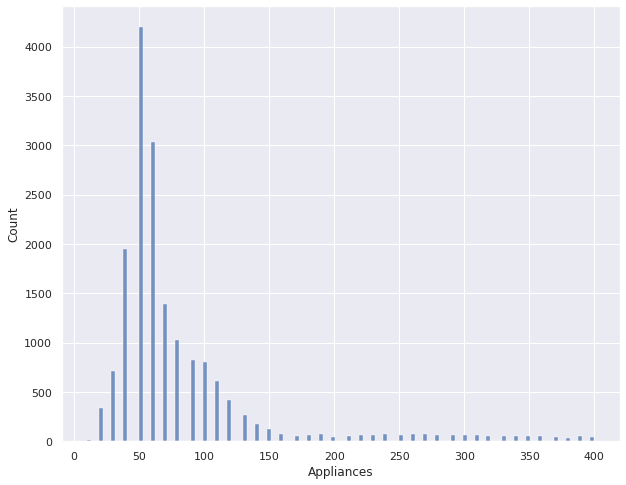

In [ ]:
sns.histplot(data=ds['Appliances'])

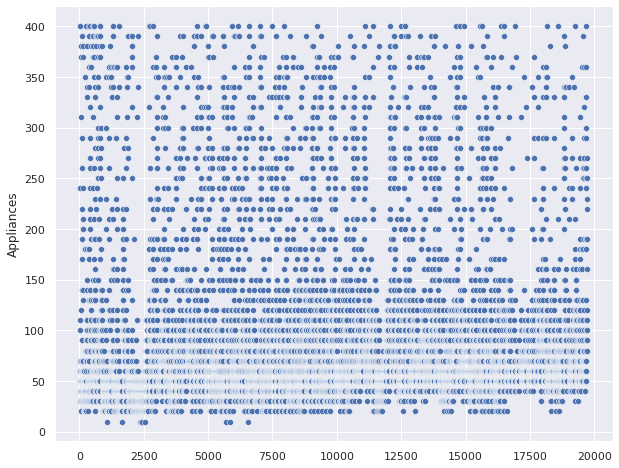

In [ ]:
sns.scatterplot(data=ds['Appliances'])

In [ ]:
ds['Appliances'].quantile(0.80)

100.0

In [ ]:
ds['Appliances'].quantile(0.60)

70.0

In [ ]:
ds['Appliances'].quantile(0.60)

70.0